## Data Cleaning 


### Imported Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

### Import the Dataset

In [20]:
aviationdata = pd.read_csv('../Data/AviationDataUP.csv')
aviationdata.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20161117X64217,Accident,WPR17WA022,14/11/2016,"Winton, New Zealand",New Zealand,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,MANEUVERING,Foreign,NaN
1,20161116X13203,Accident,CEN17WA040,14/11/2016,"Albrook, Panama",Panama,NaN,NaN,MPMG,Marcos A. Gelabert Intl.,...,NaN,NaN,NaN,NaN,NaN,2.0,VMC,LANDING,Foreign,NaN
2,20161116X62135,Accident,CEN17LA041,13/11/2016,"Port Allen, LA",United States,30.532500,-91.3150,LA46,OMNI,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Preliminary,22/11/2016
3,20161114X41943,Accident,WPR17LA020,12/11/2016,"Taylor, AZ",United States,34.454722,-110.0575,NaN,NaN,...,Instructional,NaN,NaN,NaN,NaN,2.0,VMC,MANEUVERING,Preliminary,22/11/2016
4,20161116X04207,Accident,CEN17LA039,12/11/2016,"Pleasanton, TX",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,1.0,NaN,1.0,VMC,NaN,Preliminary,16/11/2016


### Rename columns, removing '.'

In [21]:
aviationdata.columns = ['EventID', 'InvestigationType', 'AccidentNumber', 'EventDate', 'Location', 'Country', 'Latitude',
                       'Longitude', 'AirportCode', 'AirportName', 'InjurySeverity', 'AircraftDamage', 'AircraftCategory',
                       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt', 'NumberOfEngines', 'EngineType', 'FARDescription'
                       , 'Schedule', 'PurposeOfFlight', 'AirCarrier', 'TotalFatalInjuries', 'TotalSeriousInjuries',
                       'TotalMinorInjuries', 'TotalUninjured', 'WeatherCondition', 'BroadPhaseOfFlight', 'ReportStatus',
                       'PublicationDate']
aviationdata.head()

,EventID,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,PurposeOfFlight,AirCarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate
0,20161117X64217,Accident,WPR17WA022,14/11/2016,"Winton, New Zealand",New Zealand,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,MANEUVERING,Foreign,NaN
1,20161116X13203,Accident,CEN17WA040,14/11/2016,"Albrook, Panama",Panama,NaN,NaN,MPMG,Marcos A. Gelabert Intl.,...,NaN,NaN,NaN,NaN,NaN,2.0,VMC,LANDING,Foreign,NaN
2,20161116X62135,Accident,CEN17LA041,13/11/2016,"Port Allen, LA",United States,30.532500,-91.3150,LA46,OMNI,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Preliminary,22/11/2016
3,20161114X41943,Accident,WPR17LA020,12/11/2016,"Taylor, AZ",United States,34.454722,-110.0575,NaN,NaN,...,Instructional,NaN,NaN,NaN,NaN,2.0,VMC,MANEUVERING,Preliminary,22/11/2016
4,20161116X04207,Accident,CEN17LA039,12/11/2016,"Pleasanton, TX",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,1.0,NaN,1.0,VMC,NaN,Preliminary,16/11/2016


In [22]:
print(aviationdata.dtypes)

EventID                  object
InvestigationType        object
AccidentNumber           object
EventDate                object
Location                 object
Country                  object
Latitude                float64
Longitude               float64
AirportCode              object
AirportName              object
InjurySeverity           object
AircraftDamage           object
AircraftCategory         object
RegistrationNumber       object
Make                     object
Model                    object
AmateurBuilt             object
NumberOfEngines         float64
EngineType               object
FARDescription           object
Schedule                 object
PurposeOfFlight          object
AirCarrier               object
TotalFatalInjuries      float64
TotalSeriousInjuries    float64
TotalMinorInjuries      float64
TotalUninjured          float64
WeatherCondition         object
BroadPhaseOfFlight       object
ReportStatus             object
PublicationDate          object
dtype: o

In [23]:
# Check shape of data
aviationdata.shape

(79141, 31)

### Filling in null values

#### Nullity Matrix
The msno.matrix nullity matrix is a data-dense display which lets you quickly visually analyse data completion

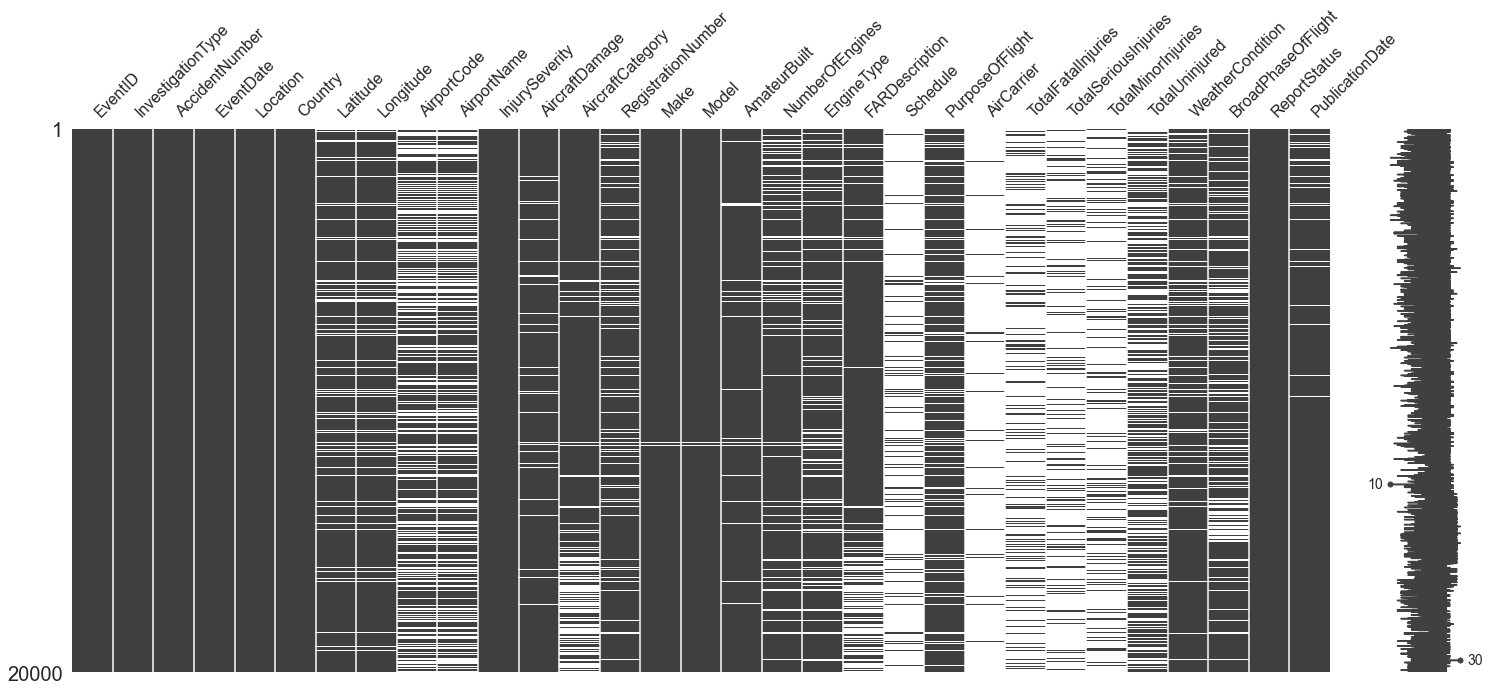

In [24]:
import missingno as msno
msno.matrix(aviationdata.head(20000))

#### Fill in null values in WeatherCondition with 'UNK',  BroadPhaseOfFlight with 'UNKNOWN', AircraftDamage with 'Unknown', PurposeOfFlight with 'Unknown', EngineType with 'Unknown', ReportStatus with 'Unknown', Country with 'Unknown'

In [25]:
aviationdata["WeatherCondition"].fillna("UNK", inplace = True)
aviationdata["BroadPhaseOfFlight"].fillna("UNKNOWN", inplace = True) 
aviationdata["AircraftDamage"].fillna("Unknown", inplace = True) 
aviationdata["PurposeOfFlight"].fillna("Unknown", inplace = True) 
aviationdata["EngineType"].fillna("Unknown", inplace = True) 
aviationdata["ReportStatus"].fillna("Unknown", inplace = True) 
aviationdata["Country"].fillna("Unknown", inplace=True)

#### Fill in null values in TotalFatalInjuries, TotalSeriousInjuries, TotalMinorInjuries, TotalUninjured with 0

In [26]:
aviationdata["TotalFatalInjuries"].fillna(value = 0, inplace = True) 
aviationdata["TotalSeriousInjuries"].fillna(value = 0, inplace = True) 
aviationdata["TotalMinorInjuries"].fillna(value = 0, inplace = True) 
aviationdata["TotalUninjured"].fillna(value = 0, inplace = True) 

#### Fill in any other null values by imputing

In [27]:
def meanFFill_imputation(df):
    df.fillna(df.mean(), inplace=True)
    return df

aviationdata= meanFFill_imputation(aviationdata)

### Create new columns

#### TotalInjuries = Fatal+Serious+Minor

In [28]:
aviationdata["TotalInjuries"] = aviationdata["TotalFatalInjuries"] + aviationdata["TotalSeriousInjuries"] 
+ aviationdata["TotalMinorInjuries"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
79136    0.0
79137    0.0
79138    0.0
79139    0.0
79140    0.0
Name: TotalMinorInjuries, Length: 79141, dtype: float64

#### Extract month and year out of EventDate

In [29]:
aviationdata["EventDate"] = pd.to_datetime(aviationdata["EventDate"], errors='coerce')

aviationdata["Month"] = aviationdata["EventDate"].dt.month
aviationdata["Year"] = aviationdata["EventDate"].dt.year

In [30]:
aviationdata.describe()

,Latitude,Longitude,NumberOfEngines,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,TotalInjuries,Month,Year
count,79141.000000,79141.000000,79141.000000,79141.000000,79141.000000,79141.000000,79141.000000,79141.000000,79141.000000,79141.000000
mean,37.703398,-93.777278,1.147970,0.575467,0.215451,0.347544,4.883954,0.790917,6.489759,1996.712968
std,6.886357,22.301237,0.441936,5.255951,1.140903,2.325257,26.926860,5.561305,3.216053,10.087592
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1948.000000
25%,37.703398,-93.777278,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1988.000000
50%,37.703398,-93.777278,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,1996.000000
75%,37.703398,-93.777278,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,9.000000,2005.000000
max,89.218056,177.557778,18.000000,349.000000,111.000000,380.000000,699.000000,349.000000,12.000000,2016.000000


### Check for null values

In [31]:
print(aviationdata.isnull().any(), "\n")

EventID                 False
InvestigationType       False
AccidentNumber          False
EventDate               False
Location                 True
Country                 False
Latitude                False
Longitude               False
AirportCode              True
AirportName              True
InjurySeverity          False
AircraftDamage          False
AircraftCategory         True
RegistrationNumber       True
Make                     True
Model                    True
AmateurBuilt             True
NumberOfEngines         False
EngineType              False
FARDescription           True
Schedule                 True
PurposeOfFlight         False
AirCarrier               True
TotalFatalInjuries      False
TotalSeriousInjuries    False
TotalMinorInjuries      False
TotalUninjured          False
WeatherCondition        False
BroadPhaseOfFlight      False
ReportStatus            False
PublicationDate          True
TotalInjuries           False
Month                   False
Year      

### Extracting categorical data
Converting object columns to category.

In [32]:
for col in aviationdata:
    if aviationdata[col].dtype == 'object':
        aviationdata[col] = aviationdata[col].astype('category')

In [33]:
# Checking types
print(aviationdata.dtypes)

EventID                       category
InvestigationType             category
AccidentNumber                category
EventDate               datetime64[ns]
Location                      category
Country                       category
Latitude                       float64
Longitude                      float64
AirportCode                   category
AirportName                   category
InjurySeverity                category
AircraftDamage                category
AircraftCategory              category
RegistrationNumber            category
Make                          category
Model                         category
AmateurBuilt                  category
NumberOfEngines                float64
EngineType                    category
FARDescription                category
Schedule                      category
PurposeOfFlight               category
AirCarrier                    category
TotalFatalInjuries             float64
TotalSeriousInjuries           float64
TotalMinorInjuries       

### Creating new dataset with needed columns

In [34]:
aviation = pd.DataFrame(aviationdata[["EventID", "WeatherCondition", "BroadPhaseOfFlight", "AircraftDamage", "InvestigationType","PurposeOfFlight",
                                     "EngineType","Country" ,"Latitude", "Longitude", "ReportStatus",
                                      "TotalFatalInjuries", "TotalSeriousInjuries", "TotalMinorInjuries",
                                     "TotalUninjured", "TotalInjuries", "InjurySeverity",
                                      "EventDate", "Month", "Year"]])

### Final Dataset

In [35]:
aviation

,EventID,WeatherCondition,BroadPhaseOfFlight,AircraftDamage,InvestigationType,PurposeOfFlight,EngineType,Country,Latitude,Longitude,ReportStatus,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,TotalInjuries,InjurySeverity,EventDate,Month,Year
0,20161117X64217,UNK,MANEUVERING,Substantial,Accident,Unknown,Turbo Shaft,New Zealand,37.703398,-93.777278,Foreign,0.0,0.0,0.0,1.0,0.0,Non-Fatal,2016-11-14,11,2016
1,20161116X13203,VMC,LANDING,Substantial,Accident,Unknown,Unknown,Panama,37.703398,-93.777278,Foreign,0.0,0.0,0.0,2.0,0.0,Non-Fatal,2016-11-14,11,2016
2,20161116X62135,VMC,TAKEOFF,Substantial,Accident,Personal,Reciprocating,United States,30.532500,-91.315000,Preliminary,0.0,0.0,0.0,1.0,0.0,Non-Fatal,2016-11-13,11,2016
3,20161114X41943,VMC,MANEUVERING,Substantial,Accident,Instructional,Reciprocating,United States,34.454722,-110.057500,Preliminary,0.0,0.0,0.0,2.0,0.0,Non-Fatal,2016-12-11,12,2016
4,20161116X04207,VMC,UNKNOWN,Substantial,Accident,Personal,Reciprocating,United States,37.703398,-93.777278,Preliminary,0.0,1.0,0.0,1.0,1.0,Non-Fatal,2016-12-11,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79136,20041105X01764,VMC,APPROACH,Destroyed,Accident,Personal,Unknown,United States,37.703398,-93.777278,Probable Cause,1.0,2.0,0.0,0.0,3.0,Fatal(1),1979-02-08,2,1979
79137,20001218X45448,IMC,CRUISE,Destroyed,Accident,Personal,Reciprocating,United States,37.703398,-93.777278,Probable Cause,2.0,0.0,0.0,0.0,2.0,Fatal(2),1977-06-19,6,1977
79138,20061025X01555,IMC,CRUISE,Destroyed,Accident,Personal,Reciprocating,United States,36.922223,-81.878056,Probable Cause,3.0,0.0,0.0,0.0,3.0,Fatal(3),1974-08-30,8,1974
79139,20001218X45447,UNK,UNKNOWN,Destroyed,Accident,Personal,Reciprocating,United States,37.703398,-93.777278,Probable Cause,4.0,0.0,0.0,0.0,4.0,Fatal(4),1962-07-19,7,1962


### Export dataset as .csv file

In [36]:
aviation.to_csv("../Data/AviationFinal.csv", index = 0)